In [25]:
import pandas as pd
url = 'https://barttorvik.com/trank.php?year={yr}&sort=&top=0&conlimit=All&venue=All&type=R#'


In [26]:
dfs = []
for x in range(2017,2026):
    print(x)
    print(url.format(yr=x))
    df = pd.read_html(url.format(yr=x), header= 1)[0]
    df['Year'] = x
    dfs.append(df)
finaldf = pd.concat(dfs,ignore_index= True)

2017
https://barttorvik.com/trank.php?year=2017&sort=&top=0&conlimit=All&venue=All&type=R#
2018
https://barttorvik.com/trank.php?year=2018&sort=&top=0&conlimit=All&venue=All&type=R#
2019
https://barttorvik.com/trank.php?year=2019&sort=&top=0&conlimit=All&venue=All&type=R#
2020
https://barttorvik.com/trank.php?year=2020&sort=&top=0&conlimit=All&venue=All&type=R#
2021
https://barttorvik.com/trank.php?year=2021&sort=&top=0&conlimit=All&venue=All&type=R#
2022
https://barttorvik.com/trank.php?year=2022&sort=&top=0&conlimit=All&venue=All&type=R#
2023
https://barttorvik.com/trank.php?year=2023&sort=&top=0&conlimit=All&venue=All&type=R#
2024
https://barttorvik.com/trank.php?year=2024&sort=&top=0&conlimit=All&venue=All&type=R#
2025
https://barttorvik.com/trank.php?year=2025&sort=&top=0&conlimit=All&venue=All&type=R#


In [27]:
#Clean up the dataset
finaldf[['Rec', 'Conf Record']] = finaldf['Rec'].str.split(' ', expand=True)
finaldf[['AdjOE', 'AdjOE Rank']] = finaldf['AdjOE'].str.split(' ', expand=True)
finaldf[['AdjDE', 'AdjDE Rank']] = finaldf['AdjDE'].str.split(' ', expand=True)
finaldf[['Barthag', 'Barthag Rank']] = finaldf['Barthag'].str.split(' ', expand=True)
finaldf[['EFG%', 'EFG% Rank']] = finaldf['EFG%'].str.split(' ', expand=True)
finaldf[['EFGD%', 'EFGD% Rank']] = finaldf['EFGD%'].str.split(' ', expand=True)
finaldf[['TOR', 'TOR Rank']] = finaldf['TOR'].str.split(' ', expand=True)
finaldf[['TORD', 'TORD Rank']] = finaldf['TORD'].str.split(' ', expand=True)
finaldf[['ORB', 'ORB Rank']] = finaldf['ORB'].str.split(' ', expand=True)
finaldf[['DRB', 'DRB Rank']] = finaldf['DRB'].str.split(' ', expand=True)
finaldf[['FTR', 'FTR Rank']] = finaldf['FTR'].str.split(' ', expand=True)
finaldf[['FTRD', 'FTRD Rank']] = finaldf['FTRD'].str.split(' ', expand=True)
finaldf[['2P%', '2P% Rank']] = finaldf['2P%'].str.split(' ', expand=True)
finaldf[['2P%D', '2P%D Rank']] = finaldf['2P%D'].str.split(' ', expand=True)
finaldf[['3P%', '3P% Rank']] = finaldf['3P%'].str.split(' ', expand=True)
finaldf[['3P%D', '3P%D Rank']] = finaldf['3P%D'].str.split(' ', expand=True)
finaldf[['3PR', '3PR Rank']] = finaldf['3PR'].str.split(' ', expand=True)
finaldf[['3PRD', '3PRD Rank']] = finaldf['3PRD'].str.split(' ', expand=True)
finaldf[['Adj T.', 'Adj T. Rank']] = finaldf['Adj T.'].str.split(' ', expand=True)
finaldf[['WAB', 'WAB Rank']] = finaldf['WAB'].str.split(' ', expand=True)
finaldf = finaldf[finaldf['Team']!= "Team"]

In [28]:
finaldf = finaldf.apply(pd.to_numeric, errors='ignore')
print(finaldf.head())

   Rk                            Team Conf   G    Rec  AdjOE  AdjDE  Barthag  \
0   1         Gonzaga  1 seed, Finals  WCC  33   32–1  119.8   88.0   0.9720   
1   2          Villanova  1 seed, R32   BE  34   31–3  122.2   92.2   0.9622   
2   3           Virginia  5 seed, R32  ACC  32  22–10  114.1   86.7   0.9591   
3   4   Kentucky  2 seed, Elite Eight  SEC  34   29–5  119.2   91.5   0.9545   
4   5  North Carolina  1 seed, CHAMPS  ACC  33   26–7  121.0   93.1   0.9531   

   EFG%  EFGD%  ...  FTR Rank  FTRD Rank  2P% Rank  2P%D Rank  3P% Rank  \
0  58.0   41.6  ...        92         12         4          2        43   
1  57.9   48.1  ...       173          1         2        155        78   
2  52.9   45.7  ...       349        151       138         28        19   
3  53.2   47.4  ...        31        164        35        122       156   
4  52.3   48.5  ...       246         79        94         71        88   

   3P%D Rank  3PR Rank  3PRD Rank  Adj T. Rank  WAB Rank  
0        

C:\Users\manas\AppData\Local\Temp\ipykernel_12648\607940783.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  finaldf = finaldf.apply(pd.to_numeric, errors='ignore')


In [29]:
def extract_tournament_result(input_string):
    if "seed" in input_string:
        parts = input_string.split("seed,")
        if len(parts) > 1:
            tounament_result = parts[1].strip()
            return tounament_result
    return None

import re
def extract_seed(input_string):
    match = re.search(r'(...)(?=seed)',input_string)
    if match:
        return match.group(1)
    return None

def extract_team_name(input_string):
    # Use regular expression to find three characters before "seed"
    match = re.search(r'^(.*?)...(?=seed)', input_string)
    if match:
        # Extract the matched substring
        return match.group(1)
    return input_string

#Adding some labeling columns for analysis later
def get_tournament_games_won (input_string):
    
    if(input_string== "R68" or input_string == "R64"):
            return 0
    else:
          if(input_string == "R32"):
                return 1
          else:
                if(input_string == "Sweet Sixteen"):
                      return 2
                else:
                      if(input_string == "Elite Eight"):
                            return 3
                      else:
                            if(input_string == "Final Four"):
                                  return 4
                            else:
                                  if(input_string == "Finals"):
                                        return 5
                                  else:
                                        if(input_string =="CHAMPS"):
                                              return 6
                                        else:
                                            return 0

In [30]:
clean_df = finaldf.copy()
clean_df['Tournament Result'] = clean_df['Team'].apply(extract_tournament_result)
clean_df['Tournament Seed'] = clean_df['Team'].apply(extract_seed)
clean_df['Team'] = clean_df['Team'].apply(extract_team_name)
clean_df = clean_df.apply(pd.to_numeric, errors='ignore')
clean_df['Tournament Games Won'] = clean_df['Tournament Result'].apply(get_tournament_games_won)

C:\Users\manas\AppData\Local\Temp\ipykernel_12648\1904196500.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  clean_df = clean_df.apply(pd.to_numeric, errors='ignore')


In [31]:
#Remove all columns with word rank in it
clean_df = clean_df[clean_df.columns.drop(list(clean_df.filter(regex='Rank')))]
print(clean_df.head())

   Rk             Team Conf   G    Rec  AdjOE  AdjDE  Barthag  EFG%  EFGD%  \
0   1         Gonzaga   WCC  33   32–1  119.8   88.0   0.9720  58.0   41.6   
1   2       Villanova    BE  34   31–3  122.2   92.2   0.9622  57.9   48.1   
2   3        Virginia   ACC  32  22–10  114.1   86.7   0.9591  52.9   45.7   
3   4        Kentucky   SEC  34   29–5  119.2   91.5   0.9545  53.2   47.4   
4   5  North Carolina   ACC  33   26–7  121.0   93.1   0.9531  52.3   48.5   

   ...  3P%D   3PR  3PRD  Adj T.   WAB  Year  Conf Record  Tournament Result  \
0  ...  30.0  32.6  31.8    71.8   7.8  2017         17–1             Finals   
1  ...  31.3  44.1  40.2    65.8  11.0  2017         15–3                R32   
2  ...  31.2  33.2  39.7    60.3   5.0  2017         11–7                R32   
3  ...  30.7  31.6  32.7    74.6   9.0  2017         16–2        Elite Eight   
4  ...  34.2  30.0  39.4    72.7   8.3  2017         14–4             CHAMPS   

   Tournament Seed  Tournament Games Won  
0      

In [32]:
clean_df['TORD']

0       17.7
1       20.2
2       21.0
3       19.4
4       18.7
        ... 
3322    15.1
3323    14.7
3324    16.6
3325    20.0
3326    14.8
Name: TORD, Length: 3202, dtype: float64

In [33]:
clean_df.columns 

Index(['Rk', 'Team', 'Conf', 'G', 'Rec', 'AdjOE', 'AdjDE', 'Barthag', 'EFG%',
       'EFGD%', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P%', '2P%D',
       '3P%', '3P%D', '3PR', '3PRD', 'Adj T.', 'WAB', 'Year', 'Conf Record',
       'Tournament Result', 'Tournament Seed', 'Tournament Games Won'],
      dtype='object')

In [34]:
#Normalize each metric by calculating the z-score for each year except adj metrics
clean_df['EFG Z'] = clean_df.groupby('Year')['EFG%'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['EFGD Z'] = clean_df.groupby('Year')['EFGD%'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['TOR Z'] = clean_df.groupby('Year')['TOR'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['TORD Z'] = clean_df.groupby('Year')['TORD'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['ORB Z'] = clean_df.groupby('Year')['ORB'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['DRB Z'] = clean_df.groupby('Year')['DRB'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['FTR Z'] = clean_df.groupby('Year')['FTR'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['FTRD Z'] = clean_df.groupby('Year')['FTRD'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['2P Z'] = clean_df.groupby('Year')['2P%'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['2PD Z'] = clean_df.groupby('Year')['2P%D'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['3P Z'] = clean_df.groupby('Year')['3P%'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['3PD Z'] = clean_df.groupby('Year')['3P%D'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['3PR Z'] = clean_df.groupby('Year')['3PR'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['3PRD Z'] = clean_df.groupby('Year')['3PRD'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['Adj T Z'] = clean_df.groupby('Year')['Adj T.'].transform(lambda x: (x - x.mean()) / x.std())
clean_df['WAB Z'] = clean_df.groupby('Year')['WAB'].transform(lambda x: (x - x.mean()) / x.std())

In [165]:
z_scores_list = ['EFG Z','EFGD Z','TOR Z','TORD Z','ORB Z','DRB Z','FTR Z','FTRD Z','2P Z','2PD Z','3P Z','3PD Z','3PR Z','3PRD Z','Adj T Z']

In [166]:
#Get correlations of z-scores with tournament seed
clean_df[z_scores_list].corr()

,EFG Z,EFGD Z,TOR Z,TORD Z,ORB Z,DRB Z,FTR Z,FTRD Z,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z
EFG Z,1.000000,-0.211129,-0.349638,-0.131793,-0.075730,-0.322410,-0.031312,-0.366186,0.890969,-0.189085,0.757804,-0.156195,0.303518,-0.036438,0.043055
EFGD Z,-0.211129,1.000000,0.099166,-0.076970,-0.322630,0.252138,-0.136568,0.105755,-0.229336,0.897719,-0.107221,0.737977,0.057900,0.144709,0.136946
TOR Z,-0.349638,0.099166,1.000000,0.105613,0.169106,0.225889,0.205623,0.316970,-0.278162,0.091634,-0.308332,0.067584,-0.168500,0.035128,-0.009411
TORD Z,-0.131793,-0.076970,0.105613,1.000000,0.183672,0.302476,0.154281,0.406768,-0.079365,-0.038205,-0.146930,-0.112436,-0.180197,0.092790,0.026851
ORB Z,-0.075730,-0.322630,0.169106,0.183672,1.000000,-0.019945,0.227818,0.135665,-0.032975,-0.315817,-0.099164,-0.195492,-0.312615,-0.010540,-0.015994
DRB Z,-0.322410,0.252138,0.225889,0.302476,-0.019945,1.000000,0.044239,0.217859,-0.296255,0.271237,-0.229003,0.120050,-0.087817,-0.009163,0.226208
FTR Z,-0.031312,-0.136568,0.205623,0.154281,0.227818,0.044239,1.000000,0.192765,0.014020,-0.111152,-0.079442,-0.118525,-0.286052,-0.035702,0.192406
FTRD Z,-0.366186,0.105755,0.316970,0.406768,0.135665,0.217859,0.192765,1.000000,-0.352653,0.112998,-0.240548,0.049703,-0.198432,-0.071345,0.094261
2P Z,0.890969,-0.229336,-0.278162,-0.079365,-0.032975,-0.296255,0.014020,-0.352653,1.000000,-0.199141,0.388886,-0.179502,0.268552,-0.042581,0.080468
2PD Z,-0.189085,0.897719,0.091634,-0.038205,-0.315817,0.271237,-0.111152,0.112998,-0.199141,1.000000,-0.106619,0.371066,0.084582,0.122237,0.148795


c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Win

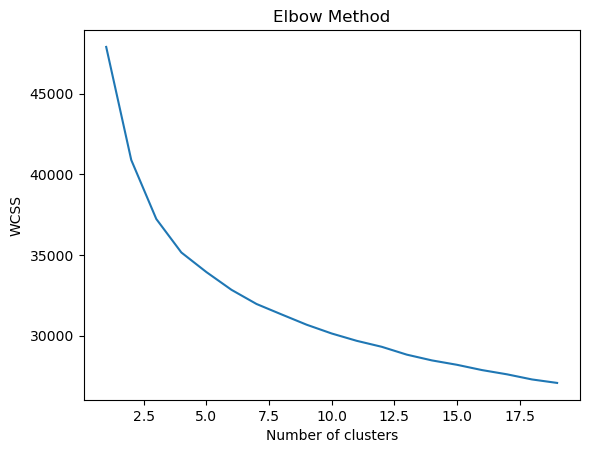

In [167]:
#Create elbow graph for k-means clustering these teams on z-scores
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Create elbow graph to determine optimal number of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clean_df[z_scores_list])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [148]:
#Create k-means clustering with 5 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clean_df['cluster'] = kmeans.fit_predict(clean_df[z_scores_list])
clean_df.head()

c:\Users\manas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(


,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,FTRD Z,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,cluster
0,1,Gonzaga,WCC,33,32–1,119.8,88.0,0.9720,58.0,41.6,...,-1.665005,2.759087,-2.825608,1.206615,-2.084406,-0.708359,-1.187008,0.782573,2.209987,0
1,2,Villanova,BE,34,31–3,122.2,92.2,0.9622,57.9,48.1,...,-2.386422,3.152786,-0.137262,0.768224,-1.545195,1.445046,0.976284,-1.253374,2.664732,0
2,3,Virginia,ACC,32,22–10,114.1,86.7,0.9591,52.9,45.7,...,-0.290877,0.215184,-1.315301,1.608472,-1.586672,-0.596007,0.847517,-3.119660,1.812085,0
3,4,Kentucky,SEC,34,29–5,119.2,91.5,0.9545,53.2,47.4,...,-0.170640,1.244859,-0.409117,0.147171,-1.794061,-0.895612,-0.955227,1.732682,2.380517,0
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,-0.737468,0.548314,-0.801797,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041,0


In [149]:
#Get average stats by cluster
cluster_stats = clean_df.groupby('cluster')[z_scores_list].mean()
cluster_stats

,EFG Z,EFGD Z,TOR Z,TORD Z,ORB Z,DRB Z,FTR Z,FTRD Z,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z
cluster,,,,,,,,,,,,,,,,
0,1.104140,-0.727375,-0.637816,-0.254144,0.072600,-0.665692,-0.110288,-0.642465,1.005558,-0.678199,0.822124,-0.498645,0.356220,-0.159638,-0.133756,1.091214
1,-0.209700,-0.707368,0.225713,0.396843,0.609557,0.068039,0.467156,0.253608,-0.107857,-0.599530,-0.268187,-0.574807,-0.429541,-0.081754,-0.027611,0.396809
2,-1.116103,0.759691,0.671873,0.265650,-0.021938,0.637087,0.044980,0.687596,-0.991882,0.659773,-0.840376,0.590091,-0.453541,0.054992,0.134430,-1.005502
3,0.232859,0.687934,-0.262480,-0.415368,-0.659994,-0.052572,-0.424788,-0.299691,0.107986,0.618807,0.294847,0.508193,0.517567,0.164707,0.026372,-0.462053


In [150]:
cluster_tournament = clean_df.groupby('cluster')[['Tournament Games Won','Tournament Seed']].mean()
cluster_tournament

,Tournament Games Won,Tournament Seed
cluster,,
0,0.469914,7.780000
1,0.115766,10.044586
2,0.000000,16.000000
3,0.008979,14.125000


In [151]:
#Get silhhouette score for k-means clustering
from sklearn.metrics import silhouette_score
silhouette_score(clean_df[z_scores_list], clean_df['cluster'])

0.09863216841661238

In [152]:
clean_df['Conf'].unique()

array(['WCC', 'BE', 'ACC', 'SEC', 'B12', 'Amer', 'MVC', 'B10', 'P12',
       'A10', 'CUSA', 'MWC', 'CAA', 'Ivy', 'AE', 'SC', 'Pat', 'SB', 'WAC',
       'MAAC', 'MAC', 'Horz', 'OVC', 'ASun', 'BSth', 'BW', 'Sum', 'MEAC',
       'BSky', 'Slnd', 'NEC', 'SWAC', 'ind'], dtype=object)

Not great in terms of clustering, maybe too many metrics? Let's try heirarchical

In [219]:
#Limit z_scores to just power conference teams
power_conferences = ['ACC','B12','BE','B10','P12','SEC']
power_conf_teams = clean_df[clean_df['Conf'].isin(power_conferences)]
power_conf_teams.head()

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,cluster,Power Conf
1,2,Villanova,BE,34,31–3,122.2,92.2,0.9622,57.9,48.1,...,3.152786,-0.137262,0.768224,-1.545195,1.445046,0.976284,-1.253374,2.664732,0,1
2,3,Virginia,ACC,32,22–10,114.1,86.7,0.9591,52.9,45.7,...,0.215184,-1.315301,1.608472,-1.586672,-0.596007,0.847517,-3.119660,1.812085,0,1
3,4,Kentucky,SEC,34,29–5,119.2,91.5,0.9545,53.2,47.4,...,1.244859,-0.409117,0.147171,-1.794061,-0.895612,-0.955227,1.732682,2.380517,0,1
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,0.548314,-0.801797,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041,0,1
5,6,Florida,SEC,32,24–8,115.7,89.3,0.9516,51.5,45.6,...,0.184900,-1.164270,0.512496,-1.794061,-0.034250,-1.264268,0.307519,1.996826,1,1


In [220]:
#Add power conference dummy to clean_df
clean_df['Power Conf'] = clean_df['Conf'].apply(lambda x: 1 if x in power_conferences else 0)
clean_df.head()

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,cluster,Power Conf
0,1,Gonzaga,WCC,33,32–1,119.8,88.0,0.9720,58.0,41.6,...,2.759087,-2.825608,1.206615,-2.084406,-0.708359,-1.187008,0.782573,2.209987,0,0
1,2,Villanova,BE,34,31–3,122.2,92.2,0.9622,57.9,48.1,...,3.152786,-0.137262,0.768224,-1.545195,1.445046,0.976284,-1.253374,2.664732,0,1
2,3,Virginia,ACC,32,22–10,114.1,86.7,0.9591,52.9,45.7,...,0.215184,-1.315301,1.608472,-1.586672,-0.596007,0.847517,-3.119660,1.812085,0,1
3,4,Kentucky,SEC,34,29–5,119.2,91.5,0.9545,53.2,47.4,...,1.244859,-0.409117,0.147171,-1.794061,-0.895612,-0.955227,1.732682,2.380517,0,1
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,0.548314,-0.801797,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041,0,1


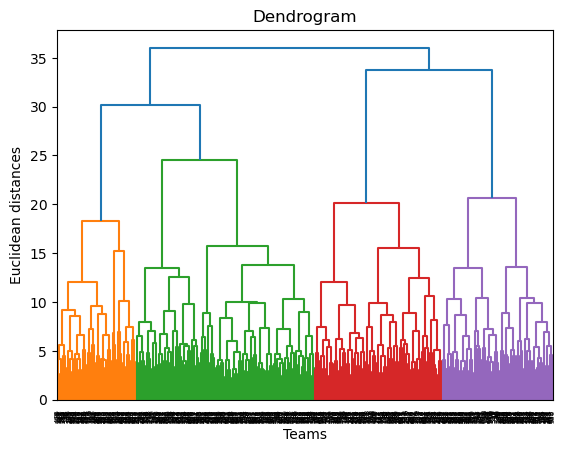

In [269]:
#Create hierarchical clustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(power_conf_teams[z_scores_list], method='ward'))
plt.title('Dendrogram')
plt.xlabel('Teams')
plt.ylabel('Euclidean distances')
plt.show()

In [270]:
#Limit to just teams that made tournament and power conference teams
tourney_teams = clean_df[clean_df['Tournament Seed'].notnull()]
tourney_power_conf_teams = tourney_teams[tourney_teams['Conf'].isin(power_conferences)]
tourney_power_conf_teams.head()

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,cluster,Power Conf
1,2,Villanova,BE,34,31–3,122.2,92.2,0.9622,57.9,48.1,...,3.152786,-0.137262,0.768224,-1.545195,1.445046,0.976284,-1.253374,2.664732,0,1
2,3,Virginia,ACC,32,22–10,114.1,86.7,0.9591,52.9,45.7,...,0.215184,-1.315301,1.608472,-1.586672,-0.596007,0.847517,-3.119660,1.812085,0,1
3,4,Kentucky,SEC,34,29–5,119.2,91.5,0.9545,53.2,47.4,...,1.244859,-0.409117,0.147171,-1.794061,-0.895612,-0.955227,1.732682,2.380517,0,1
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,0.548314,-0.801797,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041,0,1
5,6,Florida,SEC,32,24–8,115.7,89.3,0.9516,51.5,45.6,...,0.184900,-1.164270,0.512496,-1.794061,-0.034250,-1.264268,0.307519,1.996826,1,1


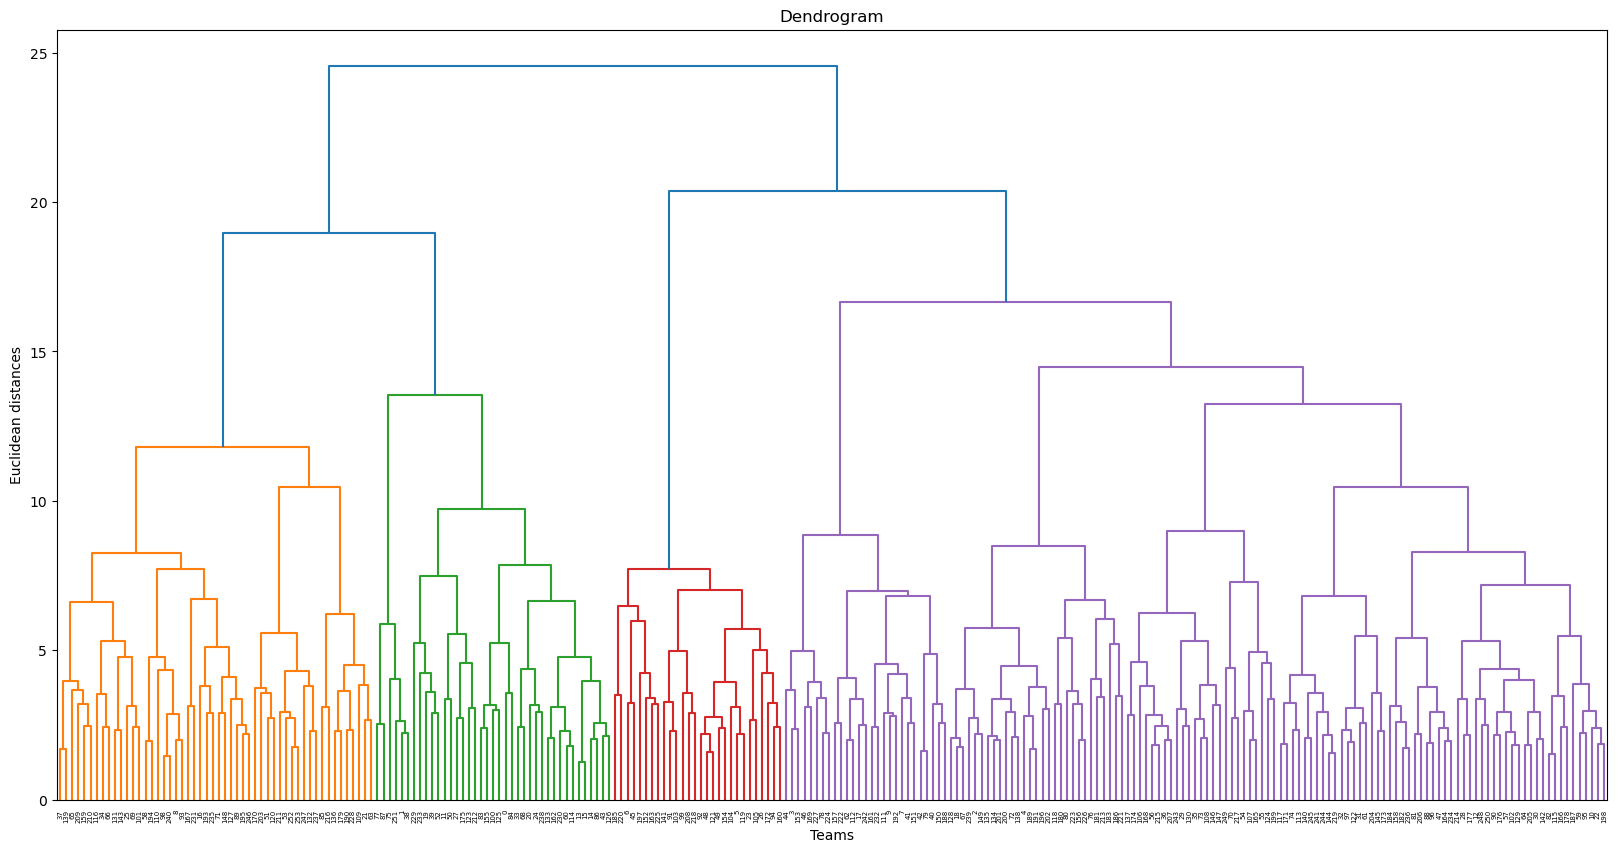

In [271]:
# Other methods for linkage include 'single', 'complete', 'average', 'weighted', 'centroid', 'median', and 'ward'
# Example using 'complete' linkage method
plt.figure(figsize=(20, 10))
Z = sch.linkage(tourney_power_conf_teams[z_scores_list], method='ward')
dendrogram = sch.dendrogram(Z)

plt.title('Dendrogram')
plt.xlabel('Teams')
plt.ylabel('Euclidean distances')
plt.show()

In [272]:
from scipy.cluster.hierarchy import fcluster
# Determine the clusters by cutting the dendrogram at a specific distance
max_d = 11  # Example distance threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster labels to your data
tourney_power_conf_teams['Cluster'] = clusters

C:\Users\manas\AppData\Local\Temp\ipykernel_12648\2275621848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourney_power_conf_teams['Cluster'] = clusters


In [273]:
tourney_power_conf_teams['Cluster'].value_counts()

Cluster
9    54
4    33
1    32
7    29
5    28
6    27
8    25
2    20
3     6
Name: count, dtype: int64

In [274]:
#Get average seed and tournament wins by Cluster
cluster_tournament = tourney_power_conf_teams.groupby('Cluster')[['Tournament Games Won','Tournament Seed']].mean()
cluster_tournament.sort_values('Tournament Games Won', ascending=False)

,Tournament Games Won,Tournament Seed
Cluster,,
6,2.185185,2.703704
7,2.137931,4.620690
4,1.515152,5.454545
2,1.500000,7.450000
3,1.500000,4.000000
5,1.178571,6.071429
1,1.093750,6.500000
8,0.880000,8.680000
9,0.870370,6.592593


In [275]:
#Look at cluster 8
tourney_power_conf_teams[tourney_power_conf_teams['Cluster'] == 8][['Team','Year','Tournament Seed','Tournament Games Won']]

,Team,Year,Tournament Seed,Tournament Games Won
35,Xavier,2017,11.0,3
55,Providence,2017,11.0,0
57,Seton Hall,2017,9.0,0
383,Auburn,2018,4.0,1
385,Kentucky,2018,5.0,2
387,Seton Hall,2018,8.0,1
414,Syracuse,2018,11.0,2
424,Providence,2018,10.0,0
779,Minnesota,2019,10.0,1
794,Arizona St.,2019,11.0,0


In [276]:
#Get z-score averages by cluster
cluster_stats = tourney_power_conf_teams.groupby('Cluster')[z_scores_list].mean()
cluster_stats

,EFG Z,EFGD Z,TOR Z,TORD Z,ORB Z,DRB Z,FTR Z,FTRD Z,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z
Cluster,,,,,,,,,,,,,,,
1,0.998142,-0.119314,-0.661501,0.391578,1.110051,0.449725,0.411649,-0.239366,0.780185,-0.063807,0.980043,-0.116298,-0.041220,-0.129523,0.690074
2,0.785020,0.075651,-1.659335,0.874290,-0.327598,0.018871,-0.430979,-0.086094,0.695617,-0.057534,0.597784,0.251779,0.134223,0.087548,-0.310344
3,0.593235,-2.199747,-2.036580,0.366968,-0.452470,-0.929130,-1.460284,-1.196495,0.034632,-1.729351,1.310428,-2.012930,-0.426072,-0.092431,-2.560536
4,1.689418,-0.572179,-1.314028,-0.200223,-0.270076,-0.410619,-0.835736,-1.203688,1.432016,-0.489887,1.398445,-0.438603,1.002633,-0.055882,-0.395769
5,-0.021471,-1.281485,-0.200800,1.948232,1.039367,0.306426,0.102397,0.592497,0.015723,-1.160323,-0.052011,-0.936241,-0.054430,0.477426,-0.567230
6,1.478546,-1.189544,-0.643984,-0.974720,1.278023,-1.122287,0.432491,-1.292344,1.195368,-1.224351,1.368624,-0.619202,-0.337792,-0.450606,0.568059
7,0.676823,-1.550887,-0.283647,0.477758,0.887033,0.179692,0.508626,0.144342,0.991807,-1.333344,-0.070002,-1.248813,-0.105402,-0.684448,0.847698
8,-0.167747,-0.627719,-0.175166,0.090173,1.367842,-0.343576,0.992906,-0.168655,0.032973,-0.448571,-0.400081,-0.662602,-0.709243,0.344560,-0.154389
9,0.511645,-1.202266,-0.483380,-0.542265,0.603252,-0.364955,0.098254,-0.666129,0.392769,-1.337708,0.474665,-0.512012,-0.243359,-0.114583,-0.402739


In [277]:
import numpy as np
# Calculate the centroids of the original clusters
centroids = []
for cluster in set(clusters):
    cluster_points = tourney_power_conf_teams[tourney_power_conf_teams['Cluster'] == cluster][z_scores_list]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)
centroids = np.array(centroids)

In [278]:
#Get silhouette score
silhouette_score(tourney_power_conf_teams[z_scores_list], tourney_power_conf_teams['Cluster'])

0.0748917575843282

In [243]:
tourney_power_conf_teams.sort_values('Tournament Games Won',ascending=False)

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,cluster,Power Conf,Cluster
1828,4,Kansas,B12,34,28–6,120.2,92.9,0.9511,54.1,46.9,...,-0.621094,0.783046,-1.468580,-0.734693,-0.869186,0.817089,2.610608,0,1,7
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,-0.801797,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041,0,1,6
1466,3,Baylor,B12,24,22–2,123.3,93.5,0.9600,57.5,49.1,...,-0.530443,2.981688,0.066043,0.341981,-0.755292,0.098672,2.347184,0,1,1
2575,2,Connecticut,BE,34,31–3,126.8,94.1,0.9686,57.1,45.1,...,-2.333758,1.186010,-0.948429,0.690754,-1.050531,-1.181206,2.842701,0,1,7
366,2,Villanova,BE,34,30–4,127.7,95.4,0.9663,59.7,49.2,...,-0.225464,1.819678,-1.032781,1.684657,-0.522735,0.037932,2.693842,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,53,USC,P12,33,26–7,109.3,96.0,0.8160,51.1,44.7,...,-2.654207,0.743345,0.017877,-1.071610,-0.795809,-0.419076,1.688272,0,1,9
1872,47,Seton Hall,BE,30,20–10,106.8,93.3,0.8254,47.6,45.4,...,-1.621515,-0.090381,-1.096966,-0.397776,-0.844727,0.199006,1.366186,1,1,9
747,18,Louisville,ACC,33,20–13,112.9,92.7,0.9061,50.9,46.4,...,-1.427860,-0.046510,-1.130620,0.989135,-0.466525,-0.149943,1.402475,0,1,9
748,19,Kansas St.,B12,33,25–8,106.5,87.5,0.9053,49.5,48.1,...,-0.347400,-0.279943,-1.340412,-0.097559,1.055215,-1.633617,2.011733,1,1,5


In [244]:
tourney_power_conf_teams = pd.get_dummies(tourney_power_conf_teams, columns=['Cluster'],drop_first=True,dtype= int)

In [264]:
#Create a linear regression to predict tournament games won
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = tourney_power_conf_teams[['AdjOE','AdjDE','Cluster_2','Cluster_3','Cluster_4','Cluster_5','Cluster_6','Cluster_7','Cluster_8','Cluster_9']]
y = tourney_power_conf_teams['Tournament Games Won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Tournament Games Won   R-squared:                       0.277
Model:                              OLS   Adj. R-squared:                  0.240
Method:                   Least Squares   F-statistic:                     7.365
Date:                  Tue, 18 Feb 2025   Prob (F-statistic):           7.51e-10
Time:                          13:20:34   Log-Likelihood:                -326.39
No. Observations:                   203   AIC:                             674.8
Df Residuals:                       192   BIC:                             711.2
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5953      3.637     -0.164      0.870      -7.770       6.579
AdjOE          0.1266      0.023      5.437      0.000       0.081       0.172
AdjDE         -0.1362      0.032     -4.308      0.000      -0.199      -0.074
Cluster_2      0.3887      0.417      0.932      0.353      -0.434       1.212
Cluster_3     -0.3036      0.652     -0.466      0.642      -1.590       0.982
Cluster_4      0.3149      0.343      0.919      0.359      -0.361       0.991
Cluster_5      0.2131      0.448      0.476      0.634      -0.670       1.096
Cluster_6      0.8064      0.391      2.064      0.040       0.036       1.577
Cluster_7      0.8010      0.416      1.926      0.056      -0.019       1.621
Cluster_8      0.4245      0.407      1.044      0.298      -0.378       1.227
Cluster_9      0.1829      0.343      0.533      0.595      -0.494       0.860
==============================================================================
Omnibus:                       26.814   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.998
Skew:                           0.930   Prob(JB):                     6.83e-08
Kurtosis:                       3.664   Cond. No.                     6.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [265]:
# Check R-squared and p-values from the model summary
print(model.summary())

# Calculate the mean squared error on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

                             OLS Regression Results                             
Dep. Variable:     Tournament Games Won   R-squared:                       0.277
Model:                              OLS   Adj. R-squared:                  0.240
Method:                   Least Squares   F-statistic:                     7.365
Date:                  Tue, 18 Feb 2025   Prob (F-statistic):           7.51e-10
Time:                          13:20:36   Log-Likelihood:                -326.39
No. Observations:                   203   AIC:                             674.8
Df Residuals:                       192   BIC:                             711.2
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5953      3.637

In [266]:
#Fit a random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.8612196078431373


In [267]:
#Add random forest predictions to X_test
X_test['Random Forest Predictions'] = y_pred_rf
X_test['Linear Predictions'] = y_pred_rf
X_test['Actual'] = y_test

#Add team name and year to X_test
X_test['Team'] = tourney_power_conf_teams['Team']
X_test['Year'] = tourney_power_conf_teams['Year']

X_test.sort_values('Random Forest Predictions',ascending=False)

,const,AdjOE,AdjDE,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Random Forest Predictions,Linear Predictions,Actual,Team,Year
1466,1.0,123.3,93.5,0,0,0,0,0,0,0,0,2.77,2.77,6,Baylor,2021
2205,1.0,114.6,91.6,0,0,0,0,0,1,0,0,2.45,2.45,3,Texas,2023
2209,1.0,112.9,91.5,0,0,0,0,0,1,0,0,2.39,2.39,1,Kansas,2023
739,1.0,121.0,95.6,0,0,1,0,0,0,0,0,2.29,2.29,3,Purdue,2019
9,1.0,120.4,94.4,0,0,0,0,0,0,0,0,2.25,2.25,3,Kansas,2017
1474,1.0,110.7,88.6,0,0,0,0,0,1,0,0,2.17,2.17,2,Alabama,2021
2215,1.0,110.7,92.0,0,0,0,0,0,1,0,0,2.12,2.12,2,Arkansas,2023
2201,1.0,118.9,92.5,0,0,0,0,0,1,0,0,2.11,2.11,6,Connecticut,2023
6,1.0,116.2,89.7,0,0,0,1,0,0,0,0,2.10,2.10,1,Louisville,2017
1837,1.0,115.1,91.6,0,0,0,0,0,0,0,1,2.07,2.07,2,UCLA,2022


In [283]:
from scipy.spatial.distance import cdist

In [284]:
def assign_clusters(new_data, centroids):
    distances = cdist(new_data, centroids, 'euclidean')
    cluster_labels = np.argmin(distances, axis=1) + 1  # Cluster labels start from 1
    return cluster_labels

In [286]:
#Get 2025 teams from clean_df
teams_2025 = clean_df[clean_df['Year'] == 2025]
#Filter to power conference
teams_2025 = teams_2025[teams_2025['Conf'].isin(power_conferences)]


teams_2025['Cluster'] = assign_clusters(teams_2025[z_scores_list], centroids)

teams_2025

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,cluster,Power Conf,Cluster
2950,1,Houston (A) 66 Arizona St.,B12,25,21–4,124.1,87.7,0.9819,52.6,45.0,...,-2.282869,2.059511,-0.972276,-0.899868,1.119063,-2.518102,2.182058,0,1,3
2951,2,Auburn,SEC,25,23–2,131.2,93.5,0.9802,56.2,45.0,...,-1.702181,1.377207,-1.707334,0.354061,-1.174567,0.422613,2.970093,0,1,7
2952,3,Duke,ACC,26,23–3,125.5,90.5,0.9772,57.3,44.4,...,-2.544178,1.604642,-0.756083,1.276067,-0.320556,-0.729829,2.182058,0,1,6
2953,4,Florida (H) 56 Oklahoma,SEC,25,22–3,124.1,94.0,0.9609,54.7,44.2,...,-1.673146,0.543281,-2.399153,0.759744,-0.540159,0.820007,2.250583,0,1,7
2954,5,Tennessee,SEC,26,21–5,116.1,88.1,0.9598,52.8,43.5,...,-1.905422,0.164224,-2.399153,0.704423,1.631470,-1.325920,2.216321,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,128,California,ACC,26,12–14,110.9,107.8,0.5801,48.5,52.9,...,0.068917,-0.480174,1.578806,-0.070062,-1.638173,-0.014520,0.177708,2,1,8
3099,145,Syracuse (A) 72 Pittsburgh,ACC,26,11–15,108.1,106.8,0.5336,50.4,52.6,...,0.649605,-0.631797,0.281645,-1.176470,0.191851,0.462353,0.074921,3,1,8
3126,171,Miami FL,ACC,25,6–19,114.2,115.2,0.4758,52.9,56.9,...,1.346430,-0.555986,2.313863,0.022138,0.118650,-0.093999,-0.764508,3,1,2
3151,195,Boston College (H) 121 Virginia Tech,ACC,25,10–15,106.0,108.4,0.4366,49.4,52.4,...,0.185054,0.884433,0.843748,-1.194910,-0.930564,-0.292696,-0.233441,2,1,8


In [289]:
teams_2025 = pd.get_dummies(teams_2025, columns=['Cluster'],drop_first=True,dtype= int)

In [290]:
teams_2025

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,cluster,Power Conf,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
2950,1,Houston (A) 66 Arizona St.,B12,25,21–4,124.1,87.7,0.9819,52.6,45.0,...,0,1,0,1,0,0,0,0,0,0
2951,2,Auburn,SEC,25,23–2,131.2,93.5,0.9802,56.2,45.0,...,0,1,0,0,0,0,0,1,0,0
2952,3,Duke,ACC,26,23–3,125.5,90.5,0.9772,57.3,44.4,...,0,1,0,0,0,0,1,0,0,0
2953,4,Florida (H) 56 Oklahoma,SEC,25,22–3,124.1,94.0,0.9609,54.7,44.2,...,0,1,0,0,0,0,0,1,0,0
2954,5,Tennessee,SEC,26,21–5,116.1,88.1,0.9598,52.8,43.5,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3082,128,California,ACC,26,12–14,110.9,107.8,0.5801,48.5,52.9,...,2,1,0,0,0,0,0,0,1,0
3099,145,Syracuse (A) 72 Pittsburgh,ACC,26,11–15,108.1,106.8,0.5336,50.4,52.6,...,3,1,0,0,0,0,0,0,1,0
3126,171,Miami FL,ACC,25,6–19,114.2,115.2,0.4758,52.9,56.9,...,3,1,1,0,0,0,0,0,0,0
3151,195,Boston College (H) 121 Virginia Tech,ACC,25,10–15,106.0,108.4,0.4366,49.4,52.4,...,2,1,0,0,0,0,0,0,1,0


In [292]:
#Now use random forest regressor to make predictions on the 2025 teams
X_2025 = teams_2025[['AdjOE','AdjDE','Cluster_2','Cluster_3','Cluster_4','Cluster_5','Cluster_6','Cluster_7','Cluster_8','Cluster_9']]
X_2025 = sm.add_constant(X_2025)
y_pred_2025 = rf.predict(X_2025)
teams_2025['Predicted Tournament Wins'] = y_pred_2025

teams_2025.to_csv('2025_predictions.csv',index=False)

What does PCA look like for this?

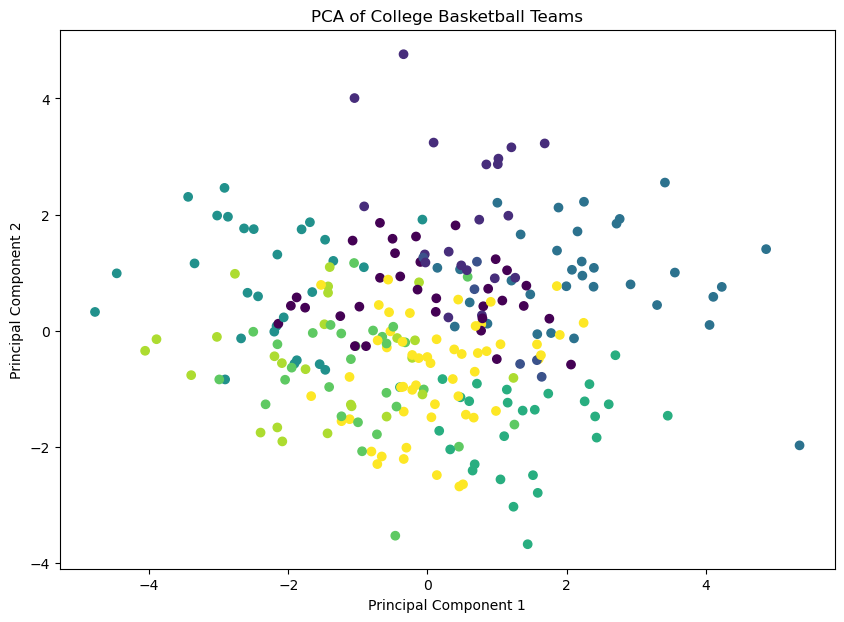

In [293]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'tourney_power_conf_teams' and 'z_scores_list' are defined

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_data = pca.fit_transform(tourney_power_conf_teams[z_scores_list])

# Plot the PCA-transformed data
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=tourney_power_conf_teams['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of College Basketball Teams')
plt.show()



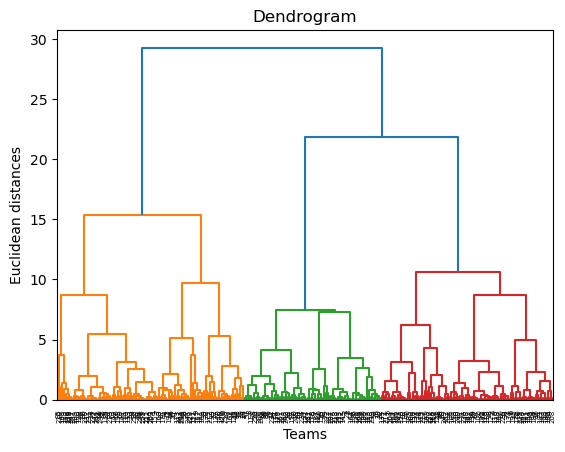

C:\Users\manas\AppData\Local\Temp\ipykernel_12648\1160102673.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourney_power_conf_teams['Cluster'] = clusters


In [ ]:
# Use the PCA-transformed data for clustering
Z = sch.linkage(pca_data, method='ward')
dendrogram = sch.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Teams')
plt.ylabel('Euclidean distances')
plt.show()


In [297]:
# Determine the clusters by cutting the dendrogram at a specific distance
max_d = 10  # Example distance threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Add the cluster labels to your data
tourney_power_conf_teams['PCA Cluster'] = clusters

C:\Users\manas\AppData\Local\Temp\ipykernel_12648\1429931110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourney_power_conf_teams['PCA Cluster'] = clusters


In [298]:
tourney_power_conf_teams

,Rk,Team,Conf,G,Rec,AdjOE,AdjDE,Barthag,EFG%,EFGD%,...,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z,WAB Z,cluster,Power Conf,Cluster,PCA Cluster
1,2,Villanova,BE,34,31–3,122.2,92.2,0.9622,57.9,48.1,...,0.768224,-1.545195,1.445046,0.976284,-1.253374,2.664732,0,1,2,2
2,3,Virginia,ACC,32,22–10,114.1,86.7,0.9591,52.9,45.7,...,1.608472,-1.586672,-0.596007,0.847517,-3.119660,1.812085,0,1,1,1
3,4,Kentucky,SEC,34,29–5,119.2,91.5,0.9545,53.2,47.4,...,0.147171,-1.794061,-0.895612,-0.955227,1.732682,2.380517,0,1,3,3
4,5,North Carolina,ACC,33,26–7,121.0,93.1,0.9531,52.3,48.5,...,0.658626,-0.342339,-1.195216,0.770256,1.087966,2.281041,0,1,3,3
5,6,Florida,SEC,32,24–8,115.7,89.3,0.9516,51.5,45.6,...,0.512496,-1.794061,-0.034250,-1.264268,0.307519,1.996826,1,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,46,Texas A&M,SEC,34,20–14,115.1,99.7,0.8399,45.4,50.1,...,-2.104678,0.031398,0.158726,1.951573,-0.770805,1.204848,1,1,4,4
2622,48,South Carolina,SEC,33,26–7,114.4,99.2,0.8368,50.8,48.0,...,-0.082689,-0.115576,0.709755,-1.563711,-1.837848,1.897226,0,1,3,3
2624,50,Virginia,ACC,33,23–10,105.1,91.7,0.8287,49.3,46.2,...,1.027423,-1.683298,-0.867327,0.668623,-3.069051,1.446307,0,1,1,1
2634,59,Oregon,P12,34,23–11,113.6,100.0,0.8134,51.8,51.5,...,-0.043042,0.227363,-0.107287,-0.280761,-0.155204,1.402670,0,1,1,1


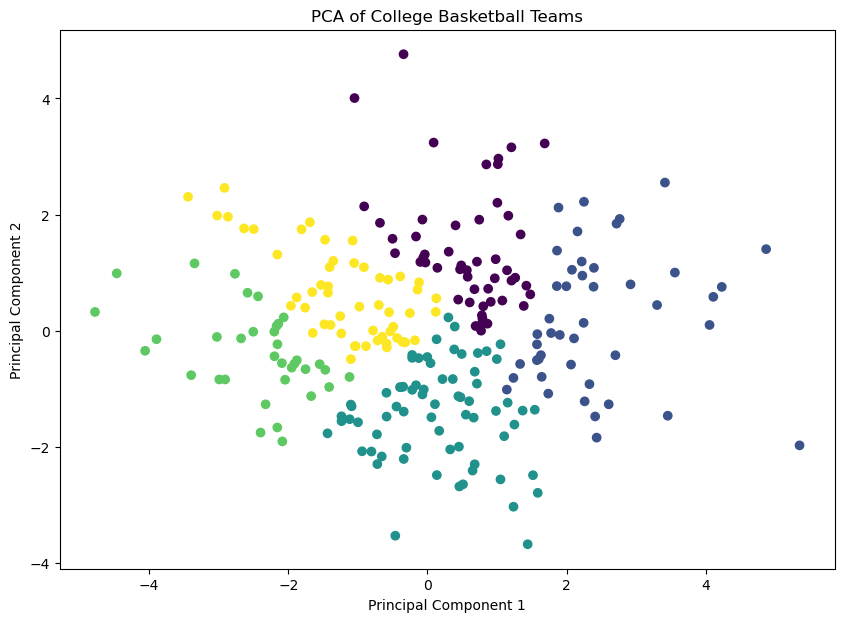

In [301]:
#Plot new PCA clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=tourney_power_conf_teams['PCA Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of College Basketball Teams')
plt.show()

In [302]:
#Get summary stats by PCA cluster
pca_cluster_tournament = tourney_power_conf_teams.groupby('PCA Cluster')[['Tournament Games Won','Tournament Seed']].mean()
pca_cluster_tournament.sort_values('Tournament Games Won', ascending=False)


,Tournament Games Won,Tournament Seed
PCA Cluster,,
2,1.688889,5.288889
3,1.428571,4.842857
1,1.313725,6.980392
5,1.188679,6.716981
4,1.171429,6.342857


In [303]:
#Get z score stats by PCA cluster
pca_cluster_stats = tourney_power_conf_teams.groupby('PCA Cluster')[z_scores_list].mean()
pca_cluster_stats

,EFG Z,EFGD Z,TOR Z,TORD Z,ORB Z,DRB Z,FTR Z,FTRD Z,2P Z,2PD Z,3P Z,3PD Z,3PR Z,3PRD Z,Adj T Z
PCA Cluster,,,,,,,,,,,,,,,
1,0.934871,-0.293099,-1.250628,0.571743,0.154995,0.074385,-0.303514,-0.479616,0.714168,-0.316167,0.888336,-0.144593,0.375383,0.273747,-0.248583
2,1.648452,-0.709363,-1.301553,-0.745006,-0.212635,-0.701033,-0.568426,-1.274580,1.330647,-0.671546,1.485532,-0.442513,0.572620,-0.343276,-0.230156
3,0.777491,-1.305881,-0.334086,-0.635910,1.182503,-0.617302,0.400052,-0.701455,0.731889,-1.360064,0.562529,-0.669758,-0.392027,-0.505880,0.110891
4,-0.129321,-1.385442,-0.032254,1.001538,1.435564,0.257383,0.843983,0.392832,0.127589,-1.210874,-0.489002,-1.116240,-0.572360,0.277826,-0.044061
5,0.331638,-0.777438,-0.467693,1.028246,0.794165,0.241344,0.210385,0.124193,0.336877,-0.631504,0.226578,-0.667190,-0.190859,0.116238,0.050889
